# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [3]:
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.dimensionality_reduction.dimensionality_reduction import unit_vector_distance

## Download from PED and Load Data

In [4]:
ens_codes = [
    "PED00423e001",
    "PED00424e001",
    "PED00160e001"
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')

File already exists. Skipping download.
File already exists. Skipping extracting.
File already exists. Skipping download.
File already exists. Skipping extracting.
File already exists. Skipping download.
File already exists. Skipping extracting.


In [5]:
analysis.generate_trajectories()

Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.
Trajectory already exists for ensemble PED00160e001. Loading trajectory.


## Featurization

In [6]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00160e001.
Transformed ensemble shape: (500, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI

In [7]:
rg = analysis.rg_calculator()
len(rg)

2500

## Dimensionality Reduction

In [8]:
analysis.fit_dimensionality_reduction(method='tsne', perplexityVals = [10, 50, 90], metric=unit_vector_distance)

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


tsne file for the perplexity value of 10 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne file for the perplexity value of 50 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne file for the perplexity value of 90 is saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction 
tsne is done! All files saved in C:\Users\nikol\Documents\test_dir\ped\dim_reduction


In [9]:
analysis.cluster(range_n_clusters=range(2,10,1))

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluste

## Test Entire Pipeline

In [1]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    "PED00423e001",
    "PED00424e001",
]
data_dir = 'C:/Users/nikol/Documents/test_dir'

featurization_params = {'featurization': 'phi_psi'}
reduce_dim_params = {'method': 'tsne', 'perplexityVals': range(500,1001,500), 'metric' : 'euclidean'}
range_n_clusters = range(2,10,1)

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.execute_pipeline(featurization_params, reduce_dim_params, range_n_clusters)

Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.
Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446

## Analysis

[10.0, 3.0]
[   1    2   12 ... 2496 2497 2498] 0
[   0    3    4 ... 2402 2442 2449] 1


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


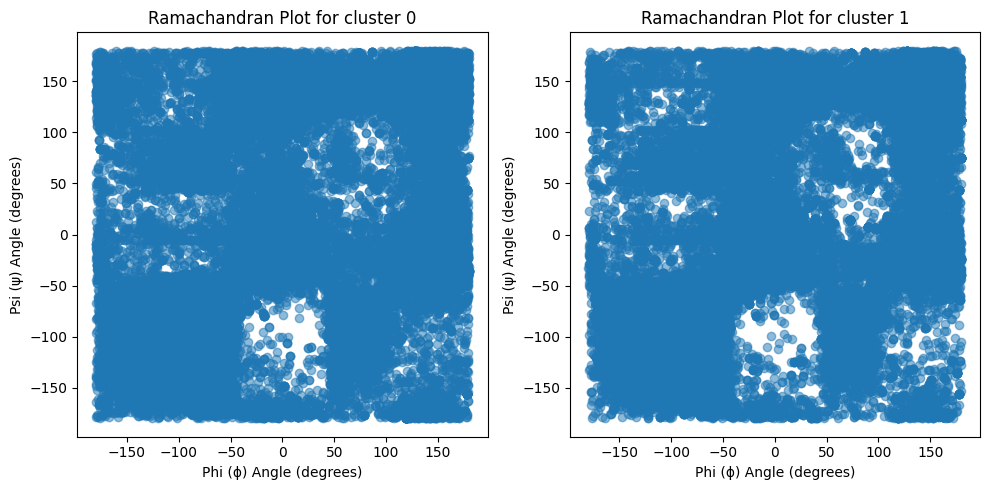

In [10]:
analysis.tsne_ramachandran_plot()

[10.0, 3.0]
[   1    2   12 ... 2496 2497 2498]
[2001 2002 2004 2005 2010 2014 2018 2021 2025 2027 2030 2033 2035 2040
 2044 2046 2047 2050 2057 2068 2071 2072 2073 2080 2081 2088 2089 2098
 2099 2100 2101 2105 2107 2113 2116 2117 2128 2130 2132 2135 2138 2142
 2143 2144 2150 2155 2162 2163 2169 2172 2173 2181 2195 2196 2197 2199
 2200 2203 2206 2207 2209 2217 2222 2223 2224 2226 2229 2230 2232 2236
 2238 2241 2242 2243 2245 2247 2256 2257 2258 2264 2269 2271 2273 2279
 2280 2283 2284 2288 2289 2295 2300 2308 2310 2311 2312 2324 2329 2330
 2333 2335 2336 2341 2343 2345 2346 2347 2349 2352 2353 2354 2356 2357
 2358 2374 2376 2380 2385 2389 2394 2396 2397 2400 2403 2406 2412 2419
 2422 2424 2425 2427 2437 2441 2443 2445 2446 2453 2454 2455 2458 2460
 2461 2462 2463 2465 2467 2474 2478 2480 2483 2487 2488 2491 2494 2499]


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


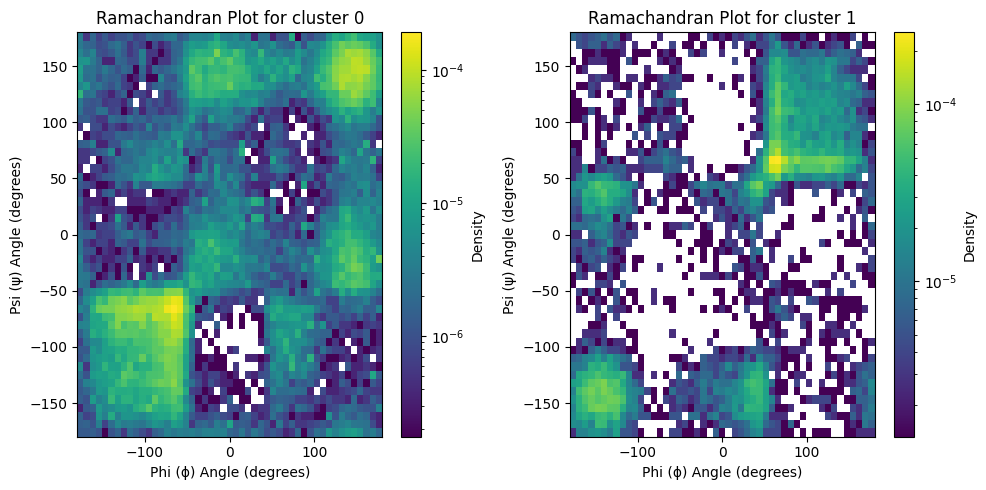

In [11]:
analysis.tsne_ramachandran_plot_density()

10.0 3.0


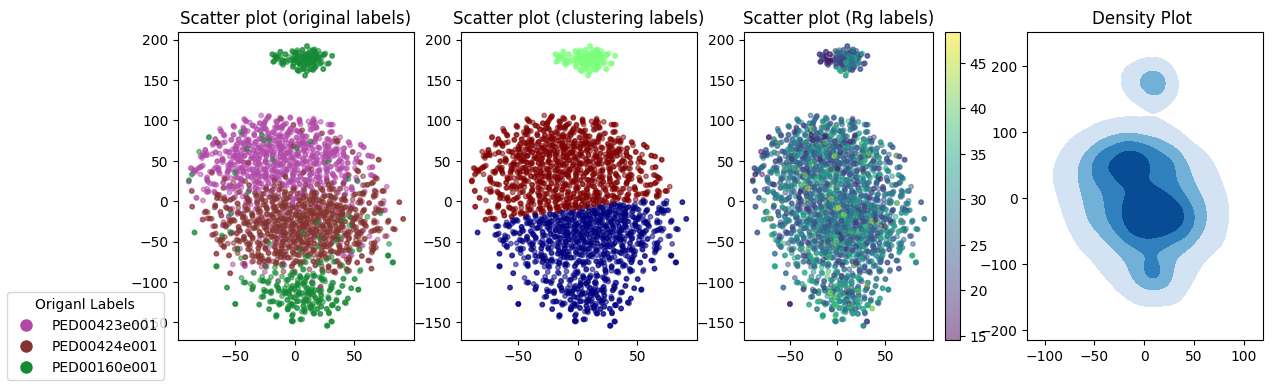

In [12]:
analysis.tsne_scatter_plot()

In [13]:
analysis.tsne_scatter_plot_2()

10.0 3.0
